In [1]:
import numpy as np
import os

import PIL as pl

import matplotlib.pyplot as plt

from PIL import ImageFilter
from PIL import Image


import pandas as pd


%matplotlib inline

plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = (14,10)

In [2]:
# Where the images are stored

raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

In [3]:
cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

In [4]:


test_img = Image.open( raw_dir+cup_dir+cup_image_name_list[0] )

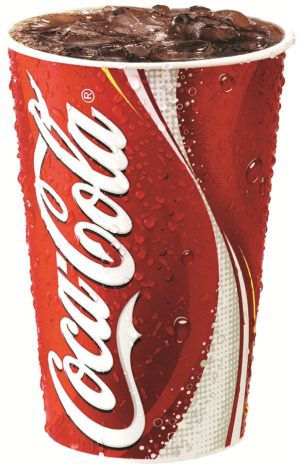

In [5]:
test_img

In [9]:
print test_img.format, test_img.size, test_img.mode

JPEG (300, 465) RGB


In [6]:
r,g,b = test_img.split()

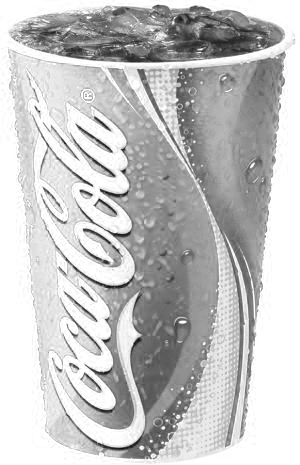

In [7]:
r

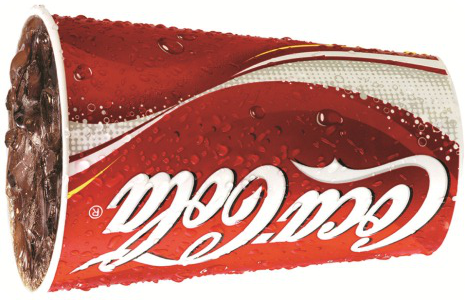

In [8]:
test_img.rotate(90)

In [11]:
foo = np.array(test_img.getdata())
pix_r = foo[:,0].reshape( test_img.size )
pix_g = foo[:,1].reshape( test_img.size )
pix_b = foo[:,2].reshape( test_img.size )

In [12]:
#  large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP

In [13]:
basewidth = 500

wpercent = (basewidth/float(test_img.size[0]))

hsize = int((float(test_img.size[1])*float(wpercent)))

resized_img = test_img.resize((basewidth,hsize), Image.ANTIALIAS)

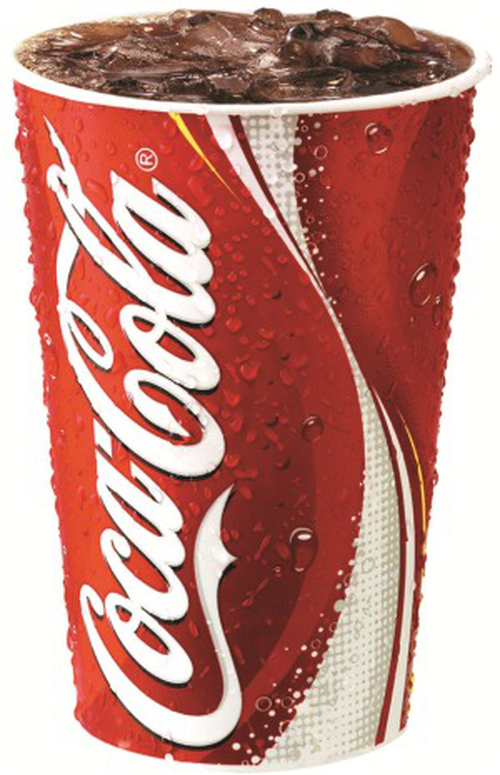

In [14]:
resized_img

In [31]:
bar = test_img.resize((300,300), Image.ANTIALIAS)

In [32]:
bar=bar.filter( ImageFilter.Kernel( [5,5], np.ones(25) ) )

In [38]:
pix_r_pooled = pool_arr( pix_r, grid_size=5, stride=5 )

In [33]:
bar = np.array( bar.getdata() )
pix_r = bar[:,0].reshape( [300,300] )
pix_g = bar[:,1].reshape( [300,300] )
pix_b = bar[:,2].reshape( [300,300] )

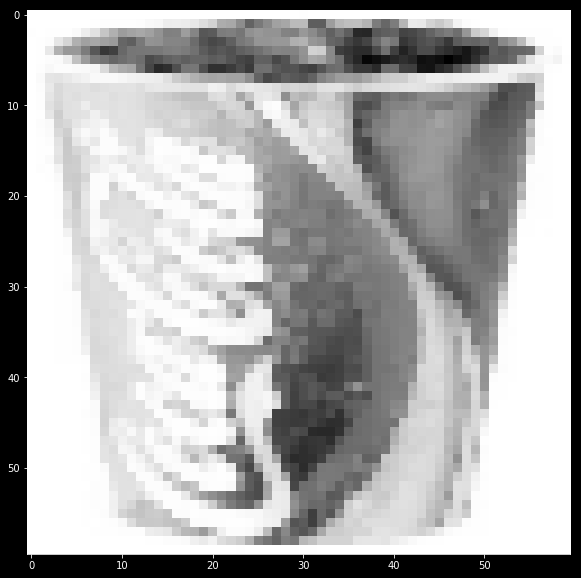

In [39]:
plt.imshow( pix_r_pooled, cmap=plt.cm.gray )

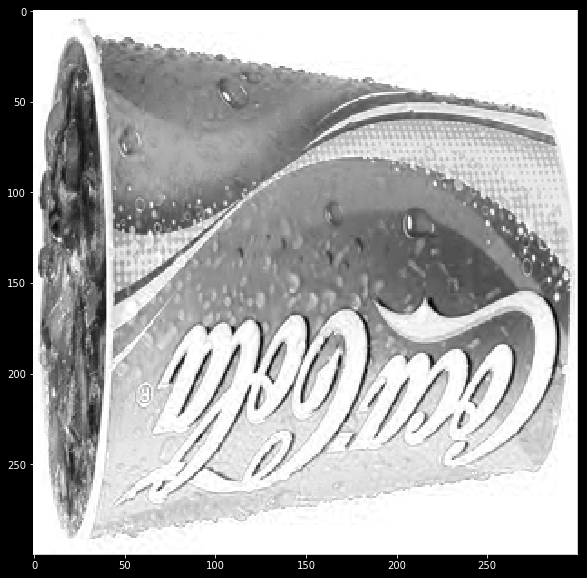

In [26]:
plt.imshow( np.rot90(pix_r), cmap=plt.cm.gray )

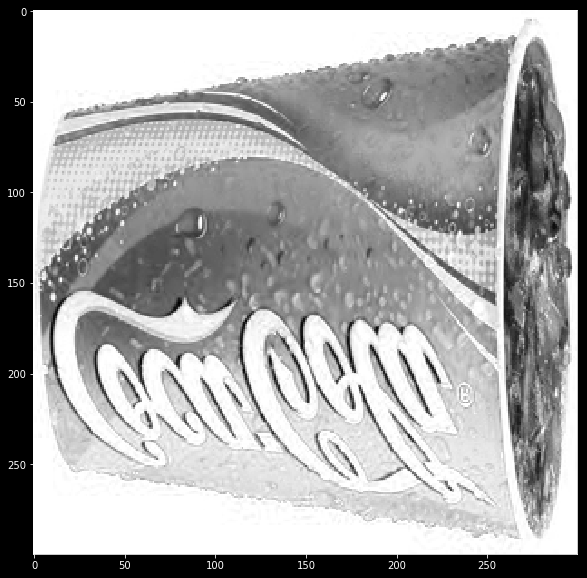

In [27]:
plt.imshow( np.rot90(pix_r[::-1]), cmap=plt.cm.gray )

In [2]:
# Do pooling
def pool_arr( inp_arr, grid_size=2, stride=2, kind='max' ):
    
    # Must be max, min, or avg
    kind = kind.lower()
    if  not ( 
             kind == 'max' or
             kind == 'min' or
             kind == 'avg' or
             kind == 'med'
            ):
        raise ValueError('kind must be max, min, med, or avg')
    
    # Operation
    o_dict = {'max':np.max,'min':np.min,'avg':np.average,'med':np.median}
    
    # Starting pixel size
    pix_0 = inp_arr.shape[0]
    pix_1 = inp_arr.shape[1]
    
    # Find resultant image size, save original size
    new_pix_0 = pix_0//stride
    new_pix_1 = pix_1//stride
    
    # Create new output image
    new_img = np.zeros( [new_pix_0,
                         new_pix_1] )

    # Loop over img and do the pooling
    # Will perform whatever function the user provided
    for     i in range( 0, new_pix_0 ):
        for j in range( 0, new_pix_1 ):


            new_img[i,j] = o_dict[kind]( 
                                        inp_arr[ 
                                                i*stride:i*stride+grid_size,
                                                j*stride:j*stride+grid_size
                                               ] 
                                       )
    
    return new_img

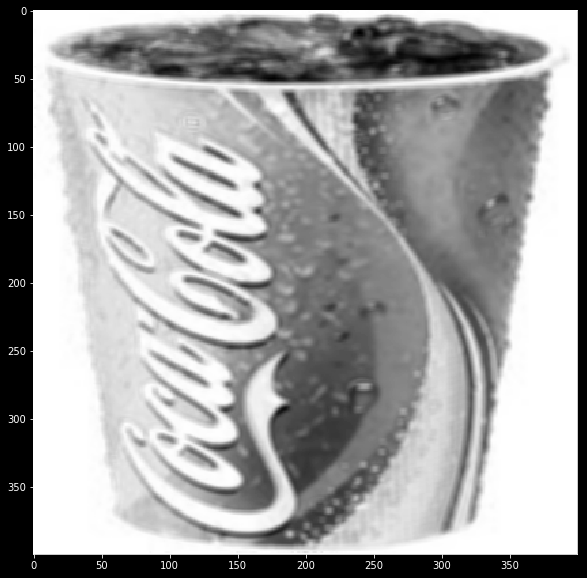

In [94]:
plt.imshow(r_pix,cmap=plt.cm.gray)

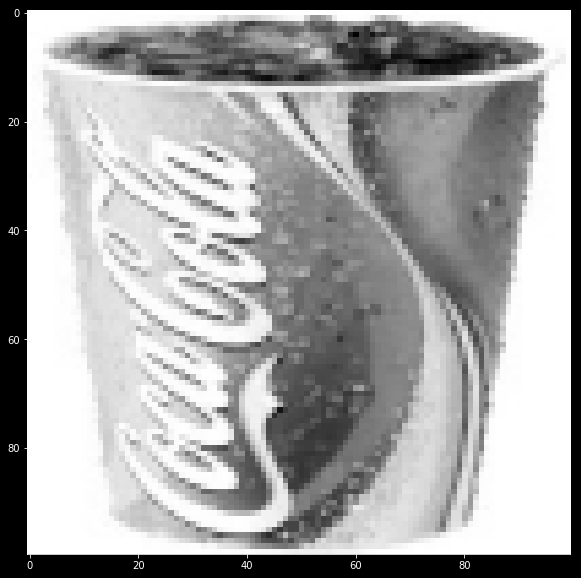

In [108]:
plt.imshow(foo,cmap=plt.cm.gray)

Below here can be used to generate a function

In [52]:
force_height   = 400 # int
force_width    = force_height # int
pool_grid_size = 5 # int
pool_stride    = 5 # int

kernel_size  = 5 # 3 or 5

resize_image = True # bool
blur_image   = True # bool
pool_image   = True # bool


raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

file_name = cup_image_name_list[0]

raw_img = Image.open( raw_dir+cup_dir+file_name )

First thing to do is read in values, resize so workable, and break into channels. Forced size will be 400x400

Convery to greyscale

In [53]:
processed_img = raw_img.convert('L')

In [54]:
# params resize_image, force_width force_height or [,]

if ( resize_image ):
    processed_img = processed_img.resize((force_width,force_height),Image.ANTIALIAS)
else:
    force_width  = processed_img.size[0]
    force_height = processed_img.size[1]

Next, blur the image

In [55]:
# params blur_image, kernel_size

if ( blur_image ):
    from PIL import ImageFilter

    # Do 5x5 kernel blurring
    processed_img = processed_img.filter( ImageFilter.Kernel( [kernel_size,kernel_size], np.ones(25) ) )

Break into channels and greyscale into array

In [56]:
img_val_arr = np.array( processed_img.getdata() )
img_shape   = processed_img.size
img_val_arr = img_val_arr.reshape( img_shape )

Try pooling to resize

In [57]:
# pool_image, pool_grid_size, pool_stride

if ( pool_image ):
    img_val_arr = pool_arr( img_val_arr, grid_size=pool_grid_size, stride=pool_stride )
    img_shape   = pool_val_arr.shape

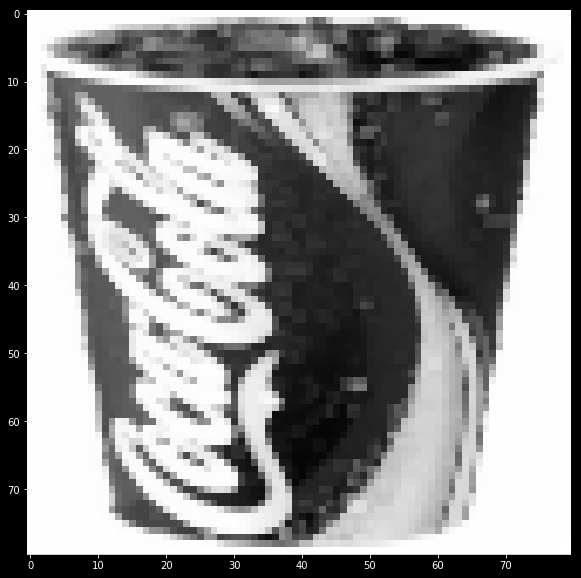

In [58]:
plt.imshow( img_val_arr, cmap=plt.cm.gray )

In [ ]:
import numpy as np
import os

import PIL as pl

import matplotlib.pyplot as plt

from PIL import ImageFilter
from PIL import Image


import pandas as pd


%matplotlib inline

plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = (14,10)

Let's create and test a function

In [30]:
from PIL import Image
from PIL import ImageFilter

import numpy as np

import os


# Checks the input stuff for images is what we expect
def _check_inp(
                    resize_image   = False , # Force an image size
                    blur_image     = False , # Blur the image
                    pool_image     = False , # Crop the image
                    resize_shape   = []    , # Forced size of image if resizing, WxH
                    kernel_size    = 5     , # Box blur kernel size, 3x3 or 5x5 option
                    pool_stride    = 2     , # Stride when pooling
                    pool_grid_size = 2     , # Grid size for pooling
                    pool_method    = 'max' , # Method for pooling: max, min, avg, med
              ):

    if not (
                isinstance( resize_image, bool ) and
                isinstance(   blur_image, bool ) and
                isinstance(   pool_image, bool )
           ):
        raise TypeError( 'resize_image, blur_image, pool_image must all be of type: bool')

    pool_method = pool_method.lower()
    if  not ( 
             pool_method == 'max' or
             pool_method == 'min' or
             pool_method == 'avg' or
             pool_method == 'med'
            ):
        raise ValueError('pool_method must be max, min, med, or avg')
        
    if not (
                isinstance( kernel_size, int ) and
                ( 
                    ( kernel_size == 3 ) or
                    ( kernel_size == 5 )
                )
           ):
        raise ValueError('kernel_size must be integer of value 3 or 5')
        
    if not (
                isinstance( pool_stride, int ) and
                          ( pool_stride > 0  )
           ):
        raise ValueError('pool_stride must be an integer > 0')
        
    if not (
                isinstance( pool_grid_size, int ) and
                          ( pool_grid_size > 0  )
           ):
        raise ValueError('pool_grid_size must be an integer > 0')
        
    rs_len = False
    if isinstance( resize_shape, list ):
        if ( 
                    ( len( resize_shape )==0 ) or 
                    ( len( resize_shape )==2 )
           ):
            rs_len = True
    if not rs_len:
        raise ValueError('resize_shape must be a list of len 2')
        

# Do pooling of input numpy array
def _pool_arr( 
                inp_arr          ,  # 2d Numpy array
                grid_size = 2    ,  # Grid size for pooling, default 2
                stride    = 2    ,  # Stride for pooling, default 2
                kind      = 'max',  # How to pool the data, default max pooling
             ):
    
    # Operation
    op_dict = {
                'max': np.max     ,
                'min': np.min     ,
                'avg': np.average ,
                'med': np.median  ,
               }
    
    # Starting pixel size
    pix_0 = inp_arr.shape[0]
    pix_1 = inp_arr.shape[1]
    
    # Find resultant image size, save original size
    new_pix_0 = pix_0//stride
    new_pix_1 = pix_1//stride
    
    # Create new output image
    new_img = np.zeros( [new_pix_0,
                         new_pix_1] )

    # Loop over img and do the pooling
    # Will perform whatever function the user provided
    for     i in range( 0, new_pix_0 ):
        for j in range( 0, new_pix_1 ):


            new_img[i,j] = op_dict[kind]( 
                                         inp_arr[ 
                                                 i*stride:i*stride+grid_size,
                                                 j*stride:j*stride+grid_size
                                                ] 
                                        )
    
    return new_img

# Run multiple steps to process and alter an image
def process_image(
                    inp_image              , # Either PIL image object or path to image
                    resize_image   = False , # Force an image size
                    blur_image     = False , # Blur the image
                    pool_image     = False , # Crop the image
                    resize_shape   = []    , # Forced size of image if resizing, WxH
                    kernel_size    = 5     , # Box blur kernel size, 3x3 or 5x5 option
                    pool_stride    = 2     , # Stride when pooling
                    pool_grid_size = 2     , # Grid size for pooling
                    pool_method    = 'max' , # Method for pooling: max, min, avg, med
                 ):
    
    
    # Check input variables are of types we expect
    _check_inp( resize_image, blur_image, pool_image, resize_shape, kernel_size, pool_stride, pool_grid_size, pool_method )

    
    # Read file if needed
    if   isinstance( inp_image, str ):
        
        if not os.path.exists( inp_image ):
            raise IOError( inp_image + ' is not a valid path to an image' )
        
        raw_img = Image.open( inp_image )
        
    elif isinstance( inp_image, Image.Image ):
        raw_img = inp_image
    else:
        raise TypeError('inp_image must be path to image or Pillow Image object')

    # Convert image to greyscale
    processed_img = raw_img.convert( 'L' )

    
    # If user is resizing image, do that here
    if ( resize_image ):
        processed_img = processed_img.resize( resize_shape, Image.ANTIALIAS )

    # Blur the image
    if ( blur_image ):

        # Do square kernel blurring
        processed_img = processed_img.filter( 
                                                ImageFilter.Kernel( 
                                                                    [ kernel_size  ,
                                                                      kernel_size ], 
                                                                  np.ones(kernel_size**2) 
                                                                 ) 
                                            )

    # Extract the data as 1d array, reshape to image dimensions
    img_val_arr = np.array( processed_img.getdata() )
    img_shape   = processed_img.size
    img_val_arr = img_val_arr.reshape( img_shape[::-1] )

    # Pool the data
    if ( pool_image ):
        
        pool_method = pool_method.lower()
        
        img_val_arr = _pool_arr( 
                                 img_val_arr                , 
                                 grid_size = pool_grid_size , 
                                 stride    = pool_stride    ,
                                 kind      = pool_method
                               )
        
    return img_val_arr

# Flips array in horizontal direction
def h_flip_array( inp_array ):
    return inp_array[:,::-1]

# Rotates in 90 deg increments
def rot_arr( inp_array, deg ):
    rot = (deg // 90)
    return np.rot90( inp_array, rot )

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = (14,10)

In [10]:
force_height   = 400 # int
force_width    = force_height # int
pool_grid_size = 5 # int
pool_stride    = 5 # int

kernel_size  = 5 # 3 or 5

resize_image = True # bool
blur_image   = True # bool
pool_image   = True # bool


raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

file_name = cup_image_name_list[0]

ful_name = ( raw_dir+cup_dir+file_name )

test_img = Image.open( ful_name )

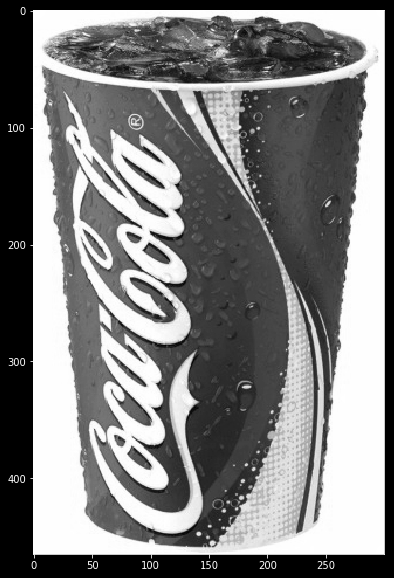

In [36]:
plt.imshow( process_image( ful_name ), cmap=plt.cm.gray )
plt.show()

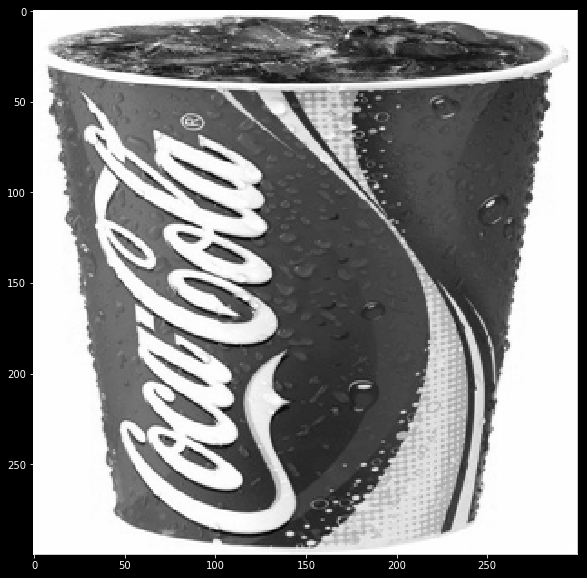

In [37]:
plt.imshow( process_image( ful_name, resize_image=True, resize_shape=[300,300] ), cmap=plt.cm.gray )
plt.show()

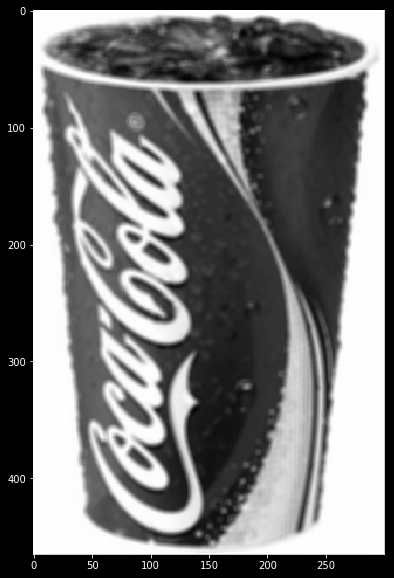

In [38]:
plt.imshow( process_image( ful_name, blur_image=True, kernel_size=5 ), cmap=plt.cm.gray )
plt.show()

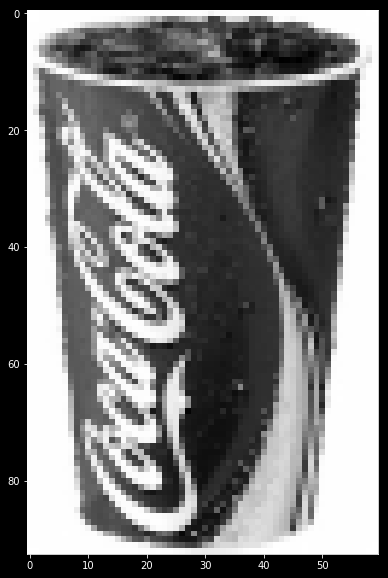

In [47]:
plt.imshow( process_image( ful_name, pool_image=True, pool_grid_size=5, pool_stride=5, pool_method='avg' ), cmap=plt.cm.gray )
plt.show()

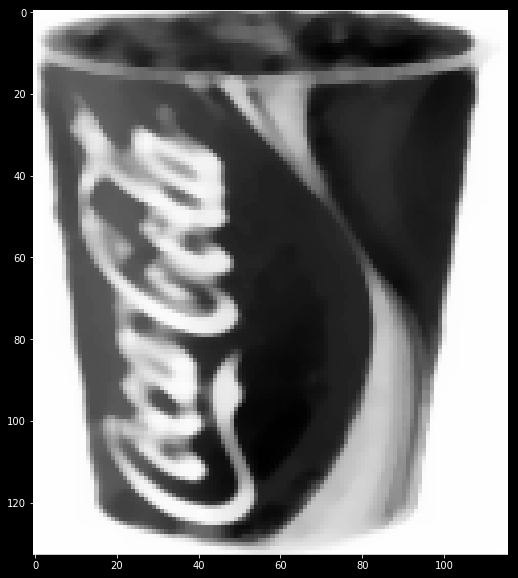

In [70]:
plt.imshow( process_image( 
                            ful_name, 
                            resize_image=True, 
                            resize_shape=[350,400], 
                            blur_image=True, 
                            kernel_size=5, 
                            pool_image=True, 
                            pool_grid_size=15, 
                            pool_stride=3, 
                            pool_method='med' 
            ), cmap=plt.cm.gray )
plt.show()

In [80]:
def h_flip_array( inp_array ):
    return inp_array[:,::-1]

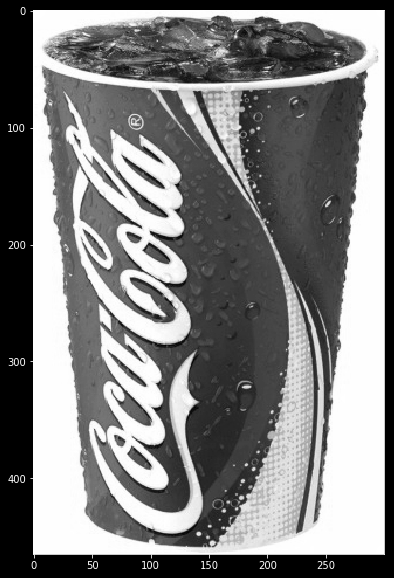

In [84]:
plt.imshow( foo, cmap=plt.cm.gray )

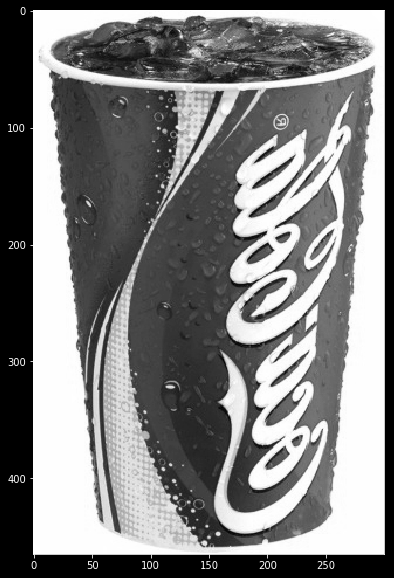

In [85]:
plt.imshow( h_flip_array(foo), cmap=plt.cm.gray )

In [96]:
# Rotates in 90 deg increments
def rot_arr( inp_array, deg ):
    rot = (deg // 90)
    return np.rot90( inp_array, rot )

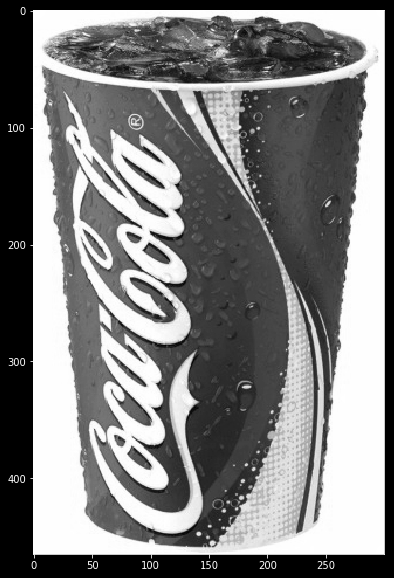

In [97]:
plt.imshow( rot_arr(foo,0),cmap=plt.cm.gray )

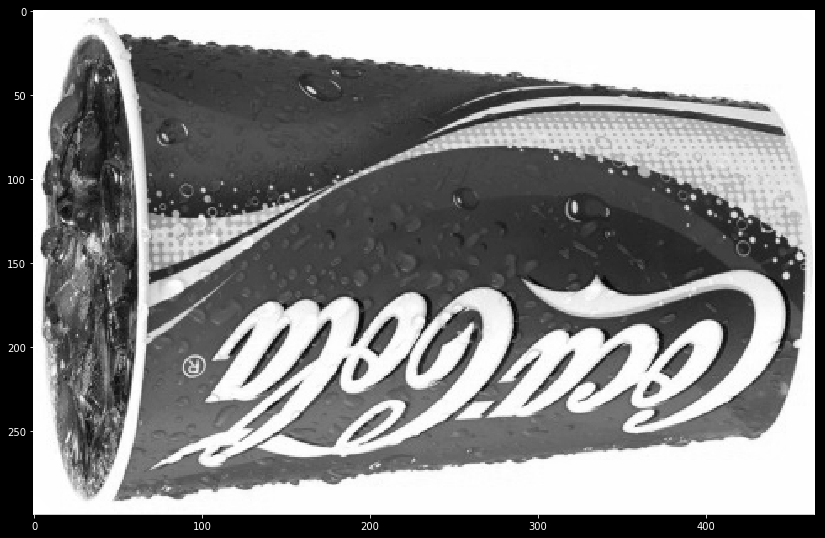

In [98]:
plt.imshow( rot_arr(foo,90),cmap=plt.cm.gray )

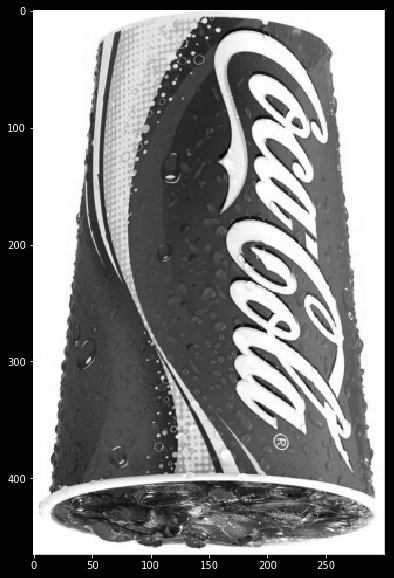

In [99]:
plt.imshow( rot_arr(foo,180),cmap=plt.cm.gray )

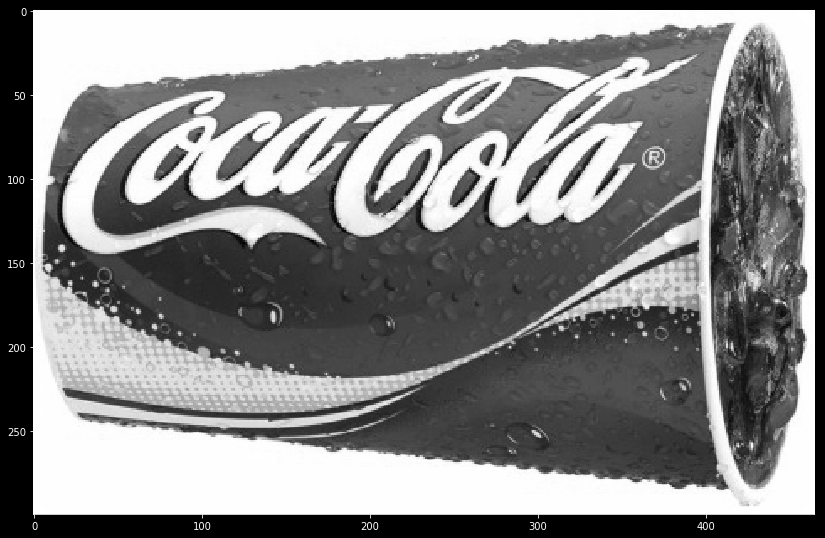

In [100]:
plt.imshow( rot_arr(foo,270),cmap=plt.cm.gray )

Translate & Rotate, saving to df

In [30]:
cols = ['name','translation','rotation',]

for color in ['r','g','b']:
    for i in range( 0, r_pooled.shape[0]*r_pooled.shape[1] ):
        cols.append( color+'_pix_'+str(i) )

out_df = pd.DataFrame( columns=cols )

In [31]:
# Do this twice, once for transposed once for not
for translated in range( 0, 2 ):
        
        
    # Rotate the images, this will rotate on different
    # iterations, creating 4 orientations
    for rot in range( 0, 4 ):
        
        # Stores pixel values for this rotation
        val_list = []
        
        for arr in [r_pooled,g_pooled,b_pooled]:
            
            for rotation in range(0,rot):
                arr = np.rot90( arr )
            
            arr = arr.reshape(1,-1)[0].tolist()
            
            val_list = val_list + arr
            
        
        # Combines pixels with metadata
        frame_entries = [file_name,translated,rot*90] + val_list
        
        
        out_row = out_df.shape[0]
        out_df.loc[out_row] = np.array( frame_entries )

In [41]:
force_height = 400
force_width  = force_height
pool_grid    = 20
pool_stride  = 20



cols = ['name','translation','rotation',]

for color in ['r','g','b']:
    for i in range( 0, (force_height//pool_stride)*(force_width//pool_stride) ):
        cols.append( color+'_pix_'+str(i) )

out_df = pd.DataFrame( columns=cols )



raw_dir = '/home/sean/Insight/Recycling/scraping/downloads/'

cup_dir = 'sfcup/'

cup_image_name_list = os.listdir( raw_dir+cup_dir )

for iii in range(0,2):
    file_name = cup_image_name_list[iii]

    raw_img = Image.open( raw_dir+cup_dir+file_name )

    resized_img = raw_img.resize((force_width,force_height),Image.ANTIALIAS)



    # Do 5x5 kernel blurring
    blurred_img = resized_img.filter( ImageFilter.Kernel( [5,5], np.ones(25) ) )


    img_val_arr = np.array( blurred_img.getdata() )
    pix_shape   = blurred_img.size
    r_pix = img_val_arr[:,0].reshape( pix_shape )
    g_pix = img_val_arr[:,1].reshape( pix_shape )
    b_pix = img_val_arr[:,2].reshape( pix_shape )


    new_pix = []
    for channel in [r_pix,g_pix,b_pix]:
        new_pix.append( pool_arr( channel, grid_size=4, stride=4 ) )
    r_pooled = new_pix[0]
    g_pooled = new_pix[1]
    b_pooled = new_pix[2]


    # Do this twice, once for transposed once for not
    for translated in range( 0, 2 ):


        # Rotate the images, this will rotate on different
        # iterations, creating 4 orientations
        for rot in range( 0, 4 ):

            # Stores pixel values for this rotation
            val_list = []

            for arr in [r_pooled,g_pooled,b_pooled]:

                for rotation in range(0,rot):
                    arr = np.rot90( arr )

                arr = arr.reshape(1,-1)[0].tolist()

                print len(arr)
                
                val_list = val_list + arr


            # Combines pixels with metadata
            frame_entries = [file_name,translated,rot*90] + val_list


            out_row = out_df.shape[0]
            print out_df.shape[0], out_df.shape, len(frame_entries)
            out_df.loc[out_row] = np.array( frame_entries )

10000
10000
10000
0 (0, 1203) 30003


ValueError: cannot set a row with mismatched columns

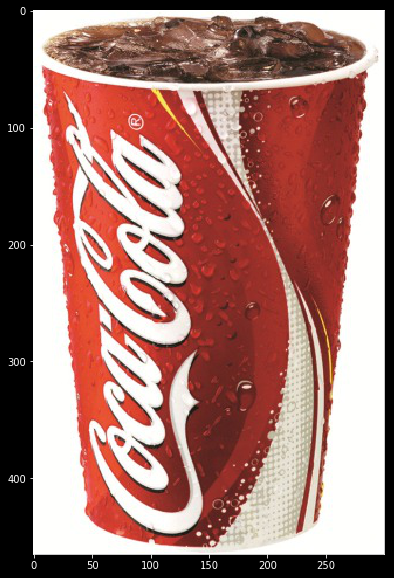

In [35]:
plt.imshow( raw_img )